In [2]:
!pip install pandas scikit-learn nltk matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MEGHNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
Step 1: Import Libraries

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\MEGHNA\Desktop\Project 2\IMDB Dataset.csv")

# View the first few rows of the dataset
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
Step 2: Load the Dataset

In [6]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MEGHNA\AppData\Roaming\nltk_data...


True

In [7]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess the text
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Lemmatize and remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text

# Apply the preprocessing to the review column
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Check the cleaned data
print(df[['review', 'cleaned_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching 1 oz episode y...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


In [ ]:
Step 3: Data Preprocessing

In [8]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# Apply TF-IDF to the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# The target variable (sentiment labels)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convert labels to binary (1: positive, 0: negative)

# View the feature matrix X
print(X.shape)


(50000, 5000)


In [ ]:
Step 4: Feature Extraction (TF-IDF Vectorization)
Converted the cleaned text into numerical form using TF-IDF

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and testing sets
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (40000, 5000), Testing set size: (10000, 5000)


In [ ]:
Step 5: Split Data into Train and Test Sets
Split the data into a training set (80%) and a test set (20%) for model evaluation

In [11]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



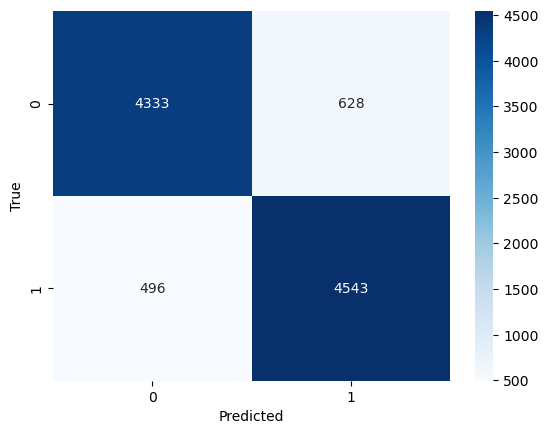

In [12]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
Step 6: Train the Logistic Regression Model
Train a Logistic Regression model on the training data

Step 7: Model Evaluation
Evaluate the performance of the model using accuracy, confusion matrix, and classification report

In [15]:
import joblib

# Save the model to a file
joblib.dump(model, 'logistic_regression_model.pkl')

# Load the model (when needed)
loaded_model = joblib.load('logistic_regression_model.pkl')


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
 Random Forest, SVM, or experiment with hyperparameter tuning using GridSearchCV

In [ ]:
Insights
Data Preprocessing: Cleaned text data.
Feature Extraction: Used TF-IDF to convert text into numerical vectors.
Model Training: Trained a Logistic Regression model.
Evaluation: Evaluated using accuracy, confusion matrix, and classification report.
Tried different models 